<h1> Dora the explorer

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
import sys
print(sys.path.append(sys.path[0][0:-4] + 'mikael'))
from pipeline import Pipin
%load_ext autoreload

None
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
pipe = Pipin()
all_data = pipe.get_combined_datasets()

NameError: name 'Pipin' is not defined

In [12]:
# Test estimates
X_test_estimated_a = pd.read_parquet("../A/X_test_estimated.parquet")
X_test_estimated_b = pd.read_parquet("../B/X_test_estimated.parquet")
X_test_estimated_c = pd.read_parquet("../C/X_test_estimated.parquet")

# train Estimate
X_train_estimated_a = pd.read_parquet("../A/X_train_estimated.parquet")
X_train_estimated_b = pd.read_parquet("../B/X_train_estimated.parquet")
X_train_estimated_c = pd.read_parquet("../C/X_train_estimated.parquet")

# Observations
X_train_observed_a = pd.read_parquet("../A/X_train_observed.parquet")
X_train_observed_b = pd.read_parquet("../B/X_train_observed.parquet")
X_train_observed_c = pd.read_parquet("../C/X_train_observed.parquet")

# Targets
y_a = pd.read_parquet("../A/train_targets.parquet")
y_b = pd.read_parquet("../B/train_targets.parquet")
y_c = pd.read_parquet("../C/train_targets.parquet")

# X_test_estimated_b.describe()
X_train_estimated_c.head()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,...,340.785004,-38.502998,0.0,285.200012,100.0,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,...,345.440002,-38.992001,0.0,285.100006,100.0,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,...,350.144012,-39.348000,0.0,285.100006,100.0,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,...,354.880005,-39.567001,0.0,285.000000,100.0,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,...,359.634003,-39.647999,0.0,285.000000,100.0,6865.000000,1.2,0.1,1.2,-0.0


In [13]:
important_features = [
    'time',
    'direct_rad:W',
    'diffuse_rad:W',
    'sun_azimuth:d',
    'sun_elevation:d',
    'clear_sky_energy_1h:J',
    'clear_sky_rad:W',
    'total_cloud_cover:p',
    'effective_cloud_cover:p',
    'rain_water:kgm2',
    'precip_5min:mm',
    'wind_speed_10m:ms',
    'wind_speed_w_1000hPa:ms',
    'snow_depth:cm',
    'snow_melt_10min:mm',
    'fresh_snow_3h:cm',
    'fresh_snow_1h:cm',
    'snow_water:kgm2',
    'super_cooled_liquid_water:kgm2',
    'snow_density:kgm3',
    'snow_drift:idx',
    'air_density_2m:kgm3',
    'pressure_100m:hPa',
    'pressure_50m:hPa',
    'sfc_pressure:hPa',
    'msl_pressure:hPa',
    'dew_point_2m:K',
    'is_day:idx',
    'is_in_shadow:idx',
    'elevation:m',
    'location:idx'
]

not_important_features = list(set(X_train_estimated_c.columns) - set(important_features))
not_important_features


['diffuse_rad_1h:J',
 'prob_rime:p',
 'fresh_snow_12h:cm',
 'fresh_snow_6h:cm',
 'visibility:m',
 'fresh_snow_24h:cm',
 'ceiling_height_agl:m',
 'wind_speed_v_10m:ms',
 'absolute_humidity_2m:gm3',
 'direct_rad_1h:J',
 't_1000hPa:K',
 'wind_speed_u_10m:ms',
 'date_forecast',
 'dew_or_rime:idx',
 'precip_type_5min:idx',
 'relative_humidity_1000hPa:p',
 'cloud_base_agl:m',
 'date_calc']

<Axes: title={'center': 'target  C'}, xlabel='time'>

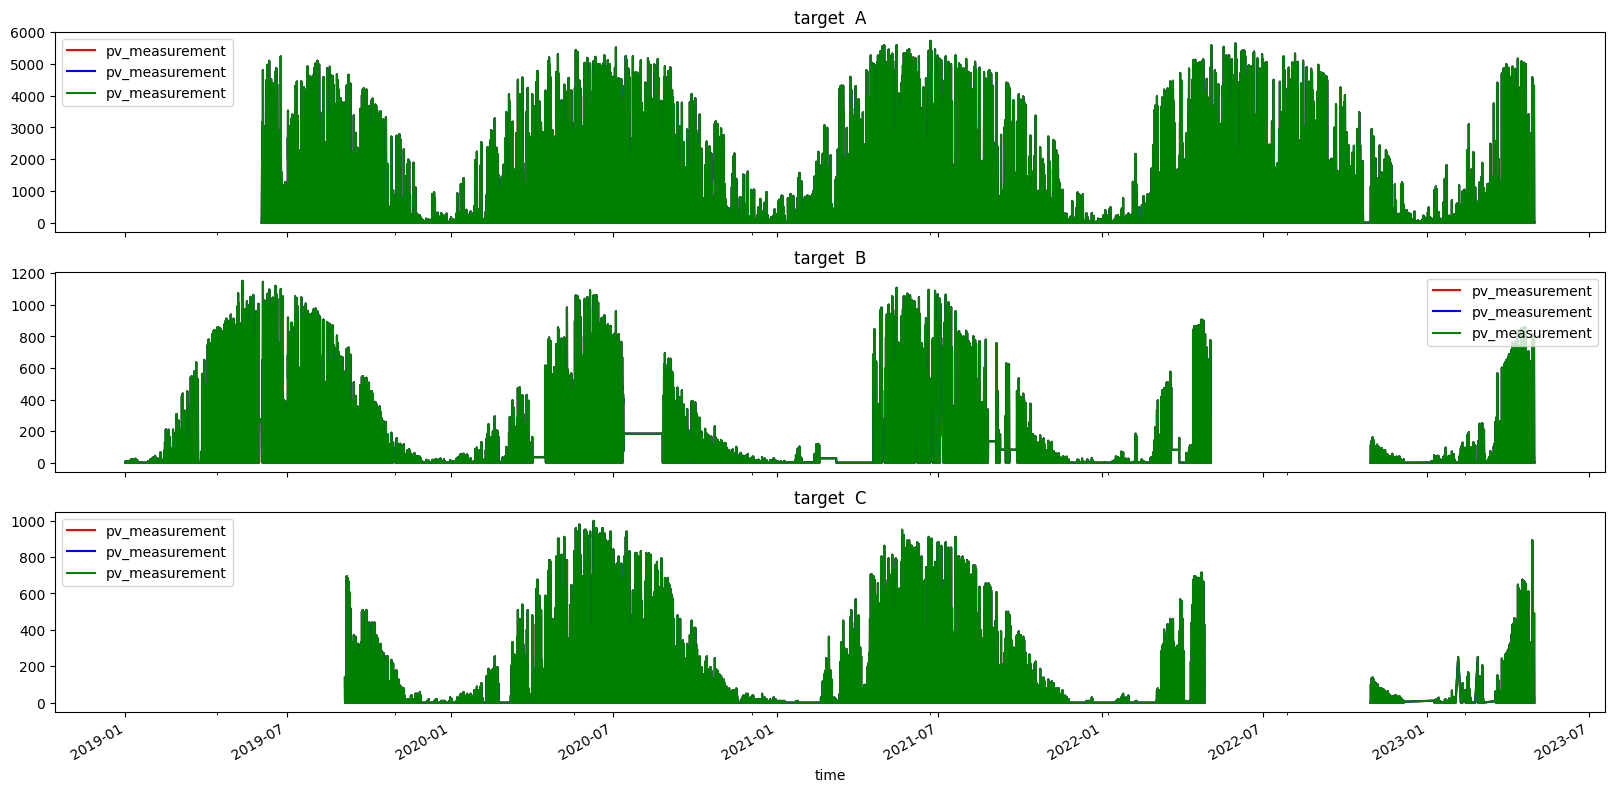

In [14]:
# correlation_matrix = np.abs(X.corr())
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'pv_measurement'
y_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='target A', color='red')
y_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='target A', color='blue')
y_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='target  A', color='green')

y_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='target  B', color='red')
y_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='target  B', color='blue')
y_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='target  B', color='green')

y_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='target  C', color='red')
y_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='target  C', color='blue')
y_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='target  C', color='green')


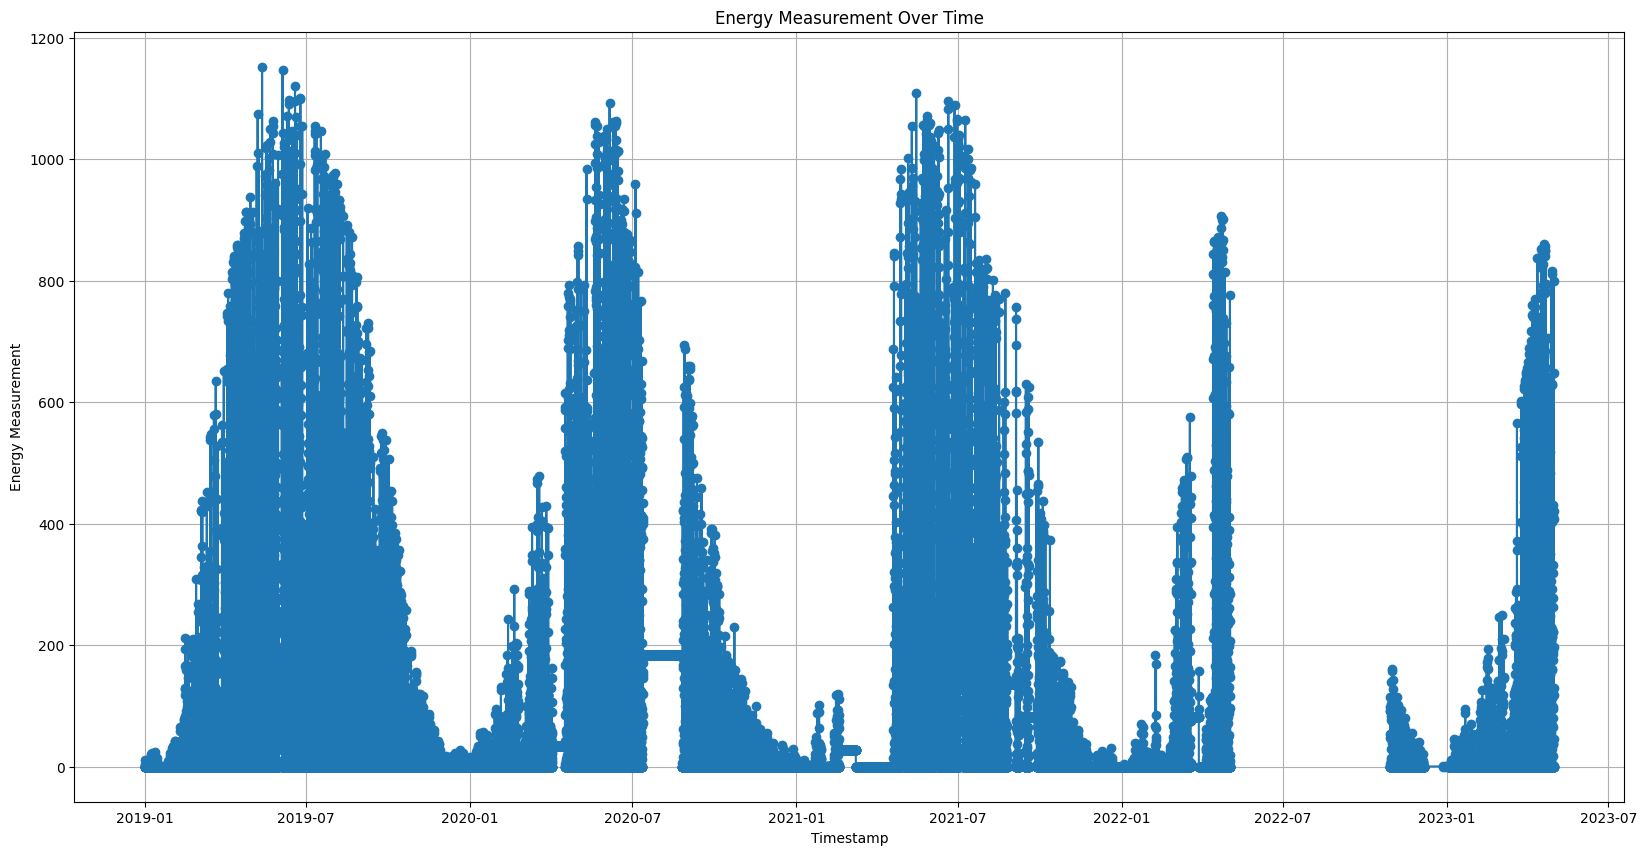

In [15]:
feature_name = "pv_measurement"
y_b['time'] = pd.to_datetime(y_b['time'])
plt.figure(figsize=(20, 10))
plt.plot(y_b['time'], y_b[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Energy Measurement')
plt.title('Energy Measurement Over Time')
plt.grid(True)
plt.show()


<h5> The sampling device seems to be broken in the interval below

/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_34190/1321599009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_b_sub['time'] = pd.to_datetime(y_b_sub['time'])


Text(0.5, 0, 'Timestamp')

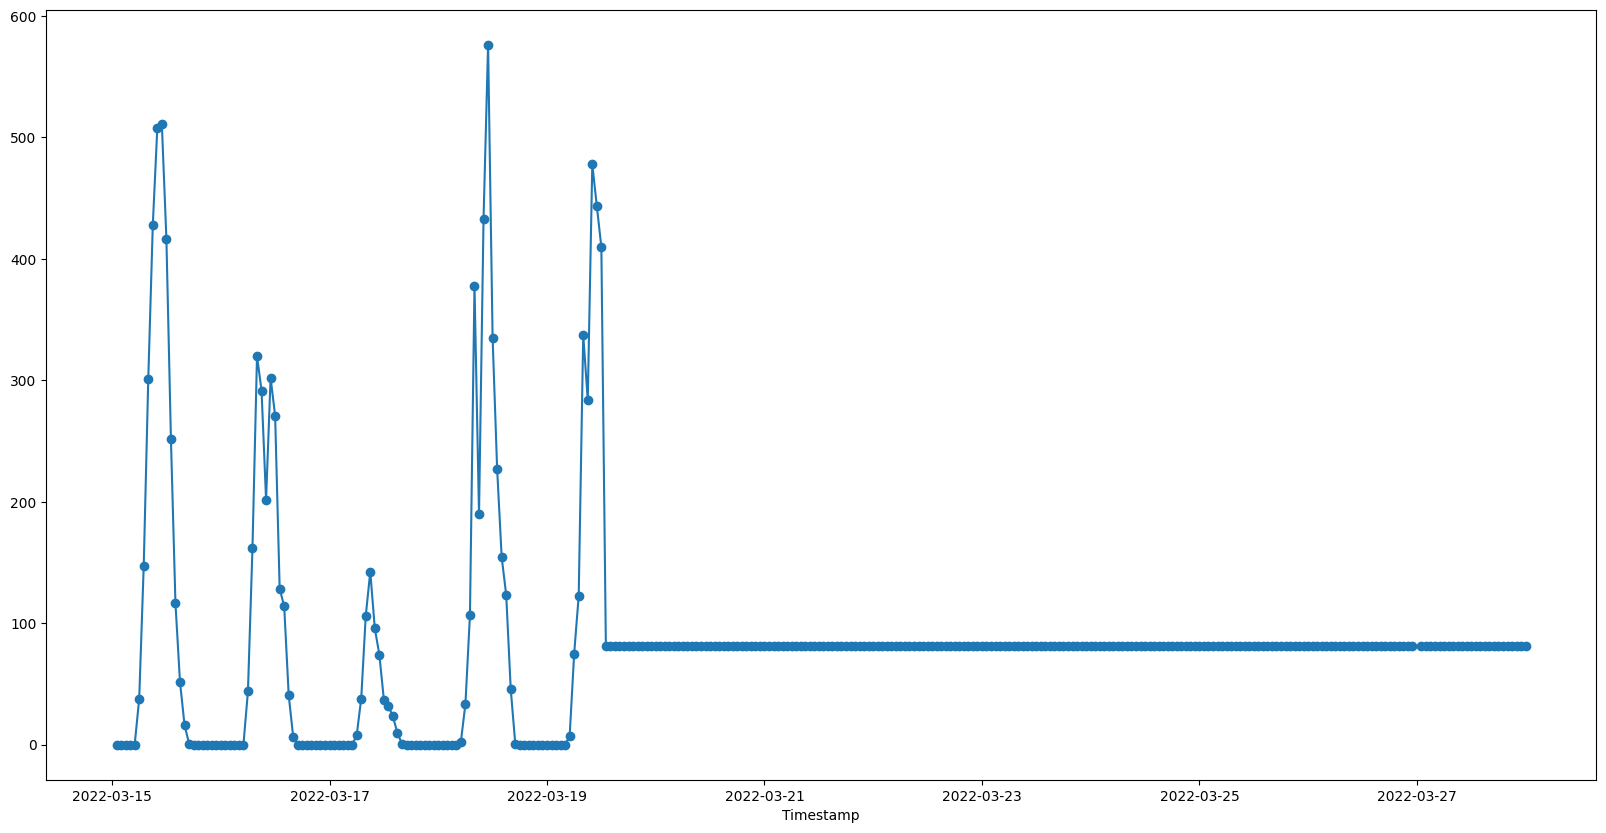

In [16]:
# select the data frames from 2020-06 to 2020-09
start_date = '2022-03-15'
end_date = '2022-03-28'

mask = (y_b['time'] > start_date) & (y_b['time'] <= end_date)
y_b_sub = y_b.loc[mask]
y_b_sub['time'] = pd.to_datetime(y_b_sub['time'])
plt.figure(figsize=(20, 10))
plt.plot(y_b_sub['time'], y_b_sub[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')


In [17]:

# for index, row in enumerate(y_b_sub.values):
#     value = row[1]
#     last_10_values = y_b_sub.iloc[index-10:index, 1].values
#     # if np.all(last_10_values == value) and index > 10:
#     #     print(row[0], last_10_values) 
#     if value == 183.7125:
#         print(row[0], row[1])

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

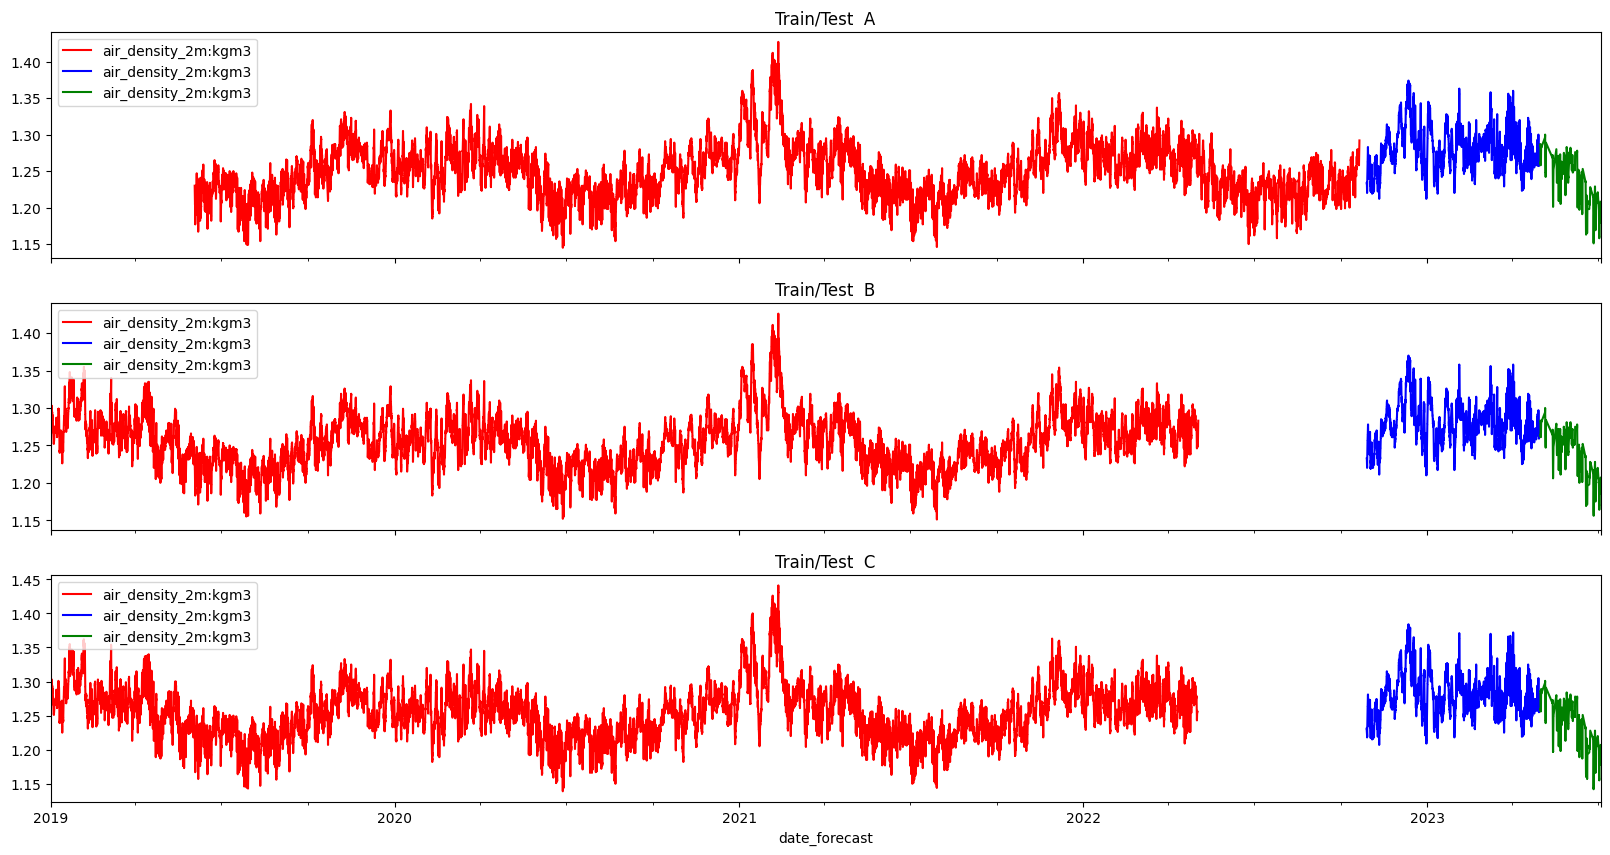

In [18]:
feature_names = X_train_observed_a.columns
# X_train_observed_a["date_forecast"] = pd.to_datetime(X_train_observed_a["date_forecast"])
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = feature_names[2]
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [19]:
feature_names

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

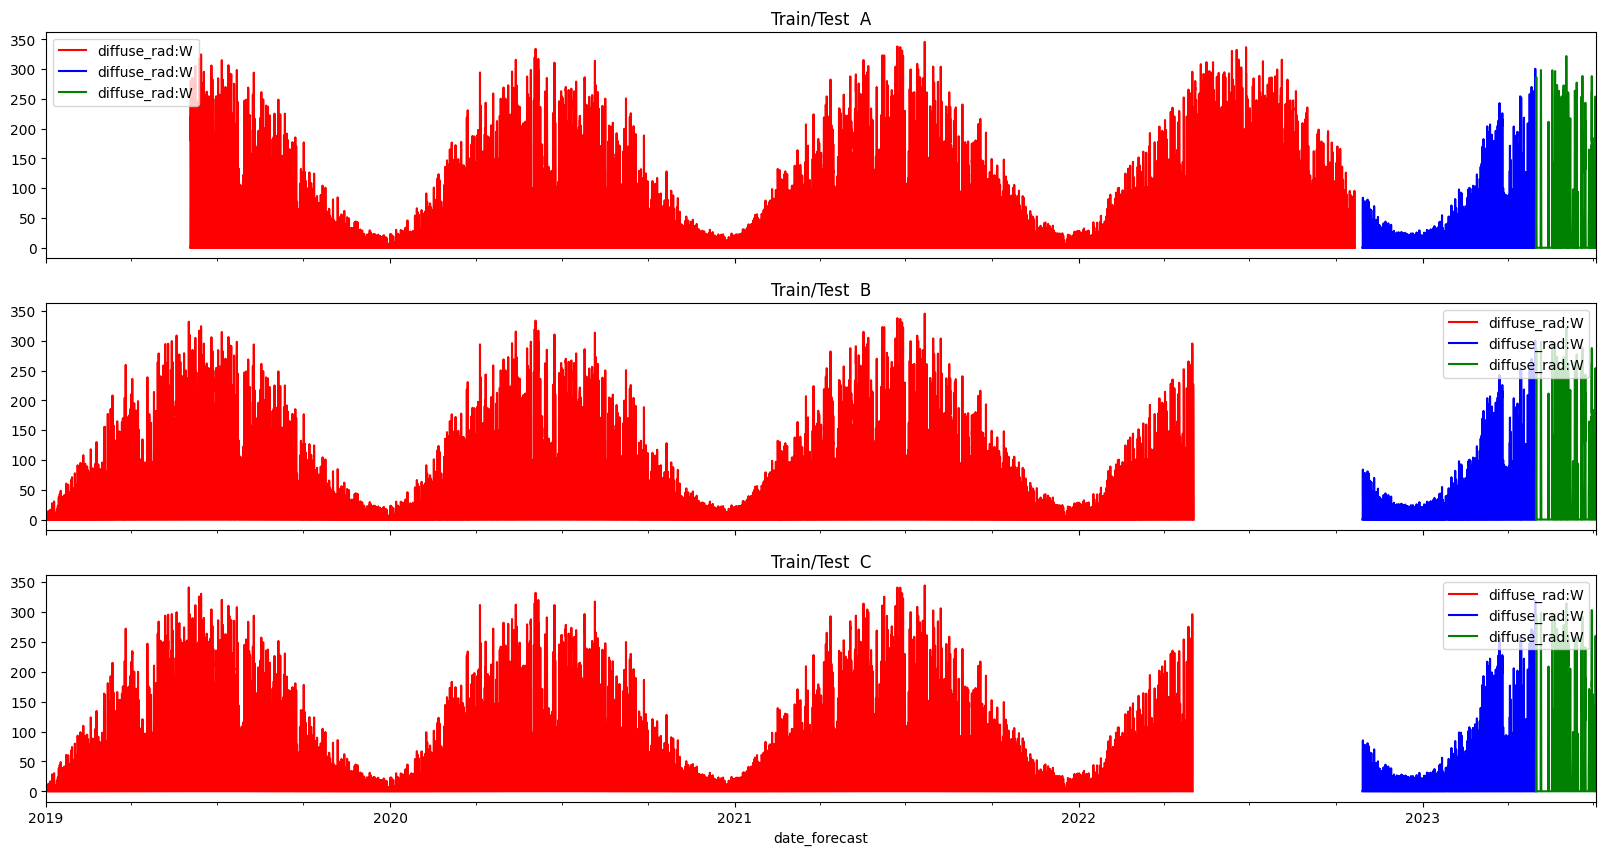

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = feature_names[2]
feature_name = "diffuse_rad:W"
# feature_name = "sun_azimuth:d"

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [21]:
feature_names

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

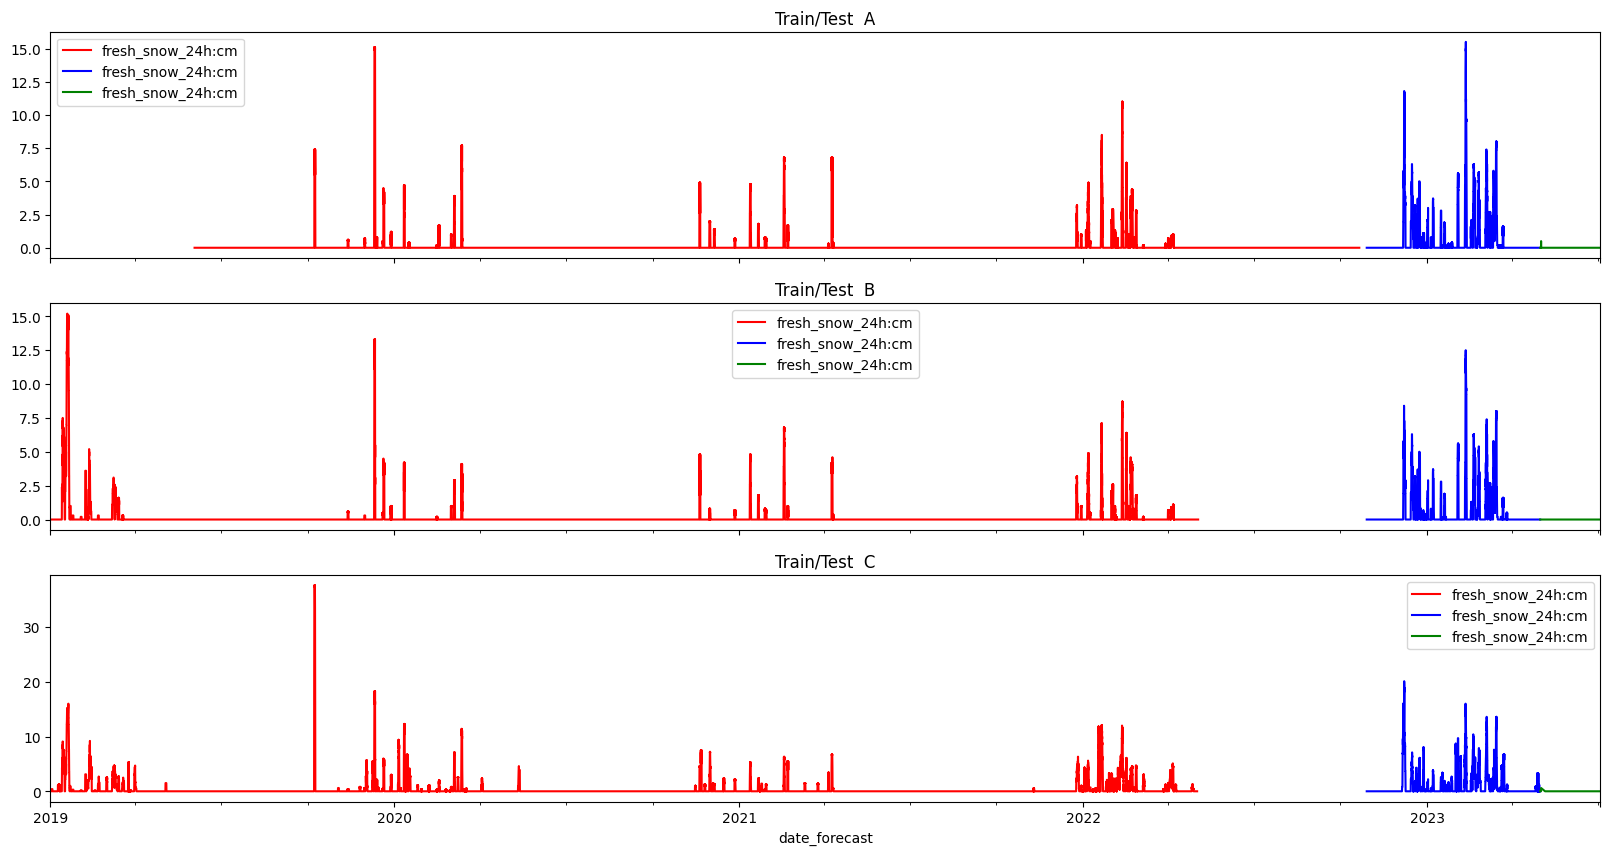

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = "sun_azimuth:d"
feature_name = "fresh_snow_24h:cm"

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')
